In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
crime = pd.read_csv("D:/Data Science- Assignments folder/Clustering/crime_data.csv")

In [3]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
crime.drop(["Unnamed: 0"],inplace=True,axis=1)

In [6]:
crime.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


## Hierarchical Clustering

In [7]:
# Normalizing the data:-

def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [8]:
df_norm = norm_func(crime.iloc[:,:])

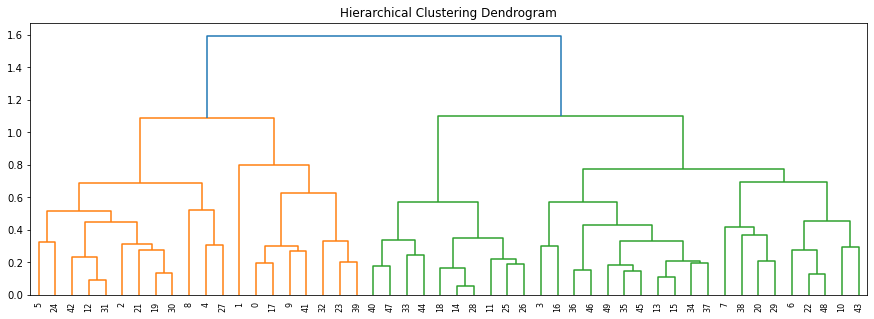

In [9]:
#Hierarchical Clustering
import scipy.cluster.hierarchy as sch

# Plotting the dendrogram 
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [10]:
from sklearn.cluster import AgglomerativeClustering

agglo= AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'single').fit(df_norm)
agglo

AgglomerativeClustering(linkage='single', n_clusters=3)

In [11]:
y_agglo=agglo.fit_predict(df_norm)
clusters=pd.DataFrame(y_agglo,columns=['clusters'])

In [12]:
clusters

,clusters
0,0
1,1
2,0
3,0
4,0
5,0
6,0
7,0
8,2
9,0


## K-means Clustering

C:\Users\Sushant Vahalkar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


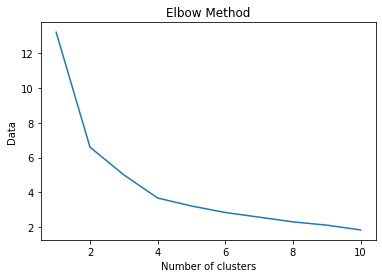

In [13]:
#K-means clustering
from sklearn.cluster import KMeans

data = []
for i in range (1,11):
    kmeans= KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_norm)
    data.append(kmeans.inertia_)
plt.plot(range(1, 11), data)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Data')
plt.show()

In [14]:
X = np.random.uniform(0,1,1000)
X

array([1.11628069e-01, 1.55304400e-03, 7.29282889e-01, 4.69803395e-01,
       8.16204772e-01, 5.87511893e-01, 6.38781518e-01, 4.81396497e-01,
       5.74121417e-01, 5.91723535e-01, 2.67291806e-01, 3.54371216e-01,
       6.32283246e-01, 5.62027794e-01, 1.48793124e-01, 2.23286286e-01,
       2.56365217e-01, 8.28668708e-01, 3.45267077e-01, 5.82111149e-01,
       1.41007237e-01, 5.48906584e-01, 4.38950834e-01, 3.73032907e-01,
       4.25053278e-01, 1.89928365e-02, 5.42577189e-01, 9.16453019e-01,
       5.32496665e-01, 2.15546880e-01, 8.19601281e-01, 8.65206630e-01,
       6.94430678e-01, 5.69598879e-01, 3.67899813e-01, 9.43126899e-02,
       2.89516945e-01, 9.73707352e-01, 1.68090293e-01, 3.18488789e-01,
       6.50327226e-02, 8.25481610e-01, 1.74095110e-01, 8.50318937e-01,
       1.19437452e-01, 5.03575508e-01, 4.75340400e-01, 4.94001013e-01,
       3.40034320e-01, 2.73431580e-01, 7.60591357e-01, 5.17969401e-01,
       5.78125135e-01, 4.62556808e-01, 6.42105790e-01, 2.08106019e-01,
      

In [15]:
# Obtained best K value is 4 ; N_cluters=4

model=KMeans(n_clusters=4) 
model.fit(df_norm) #fit the data which is normalized

model.labels_

array([1, 3, 3, 1, 3, 3, 0, 0, 3, 1, 0, 2, 3, 0, 2, 0, 2, 1, 2, 3, 0, 3,
       2, 1, 0, 2, 2, 3, 2, 0, 3, 3, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 3, 0,
       2, 0, 0, 2, 2, 0])

In [16]:
md=pd.Series(model.labels_)  
# Converting numpy array into pandas series object 

crime['clust']=md 
# Creating a  new column and assigning it to new column 

df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [17]:
# 4 cluters =0,1,2,3
crime.iloc[:,:].groupby(crime.clust).mean()

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,5.852941,141.176471,73.647059,19.335294
1,13.937500,243.625000,53.750000,21.412500
2,3.600000,78.538462,52.076923,12.176923
3,10.966667,264.000000,76.500000,33.608333


In [18]:
crime.head()

,Murder,Assault,UrbanPop,Rape,clust
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,3
2,8.1,294,80,31.0,3
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,3


## DBSCAN Clustering

In [19]:
crime.head()

,Murder,Assault,UrbanPop,Rape,clust
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,3
2,8.1,294,80,31.0,3
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,3


In [20]:
print(crime.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
 4   clust     50 non-null     int32  
dtypes: float64(2), int32(1), int64(2)
memory usage: 1.9 KB
None


In [21]:
array=crime.values
array

array([[ 13.2, 236. ,  58. ,  21.2,   1. ],
       [ 10. , 263. ,  48. ,  44.5,   3. ],
       [  8.1, 294. ,  80. ,  31. ,   3. ],
       [  8.8, 190. ,  50. ,  19.5,   1. ],
       [  9. , 276. ,  91. ,  40.6,   3. ],
       [  7.9, 204. ,  78. ,  38.7,   3. ],
       [  3.3, 110. ,  77. ,  11.1,   0. ],
       [  5.9, 238. ,  72. ,  15.8,   0. ],
       [ 15.4, 335. ,  80. ,  31.9,   3. ],
       [ 17.4, 211. ,  60. ,  25.8,   1. ],
       [  5.3,  46. ,  83. ,  20.2,   0. ],
       [  2.6, 120. ,  54. ,  14.2,   2. ],
       [ 10.4, 249. ,  83. ,  24. ,   3. ],
       [  7.2, 113. ,  65. ,  21. ,   0. ],
       [  2.2,  56. ,  57. ,  11.3,   2. ],
       [  6. , 115. ,  66. ,  18. ,   0. ],
       [  9.7, 109. ,  52. ,  16.3,   2. ],
       [ 15.4, 249. ,  66. ,  22.2,   1. ],
       [  2.1,  83. ,  51. ,   7.8,   2. ],
       [ 11.3, 300. ,  67. ,  27.8,   3. ],
       [  4.4, 149. ,  85. ,  16.3,   0. ],
       [ 12.1, 255. ,  74. ,  35.1,   3. ],
       [  2.7,  72. ,  66. ,  14

In [22]:
#DBSCAN Clustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

st_scaler= StandardScaler().fit(array)
X =st_scaler.transform(array)
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116, -0.3380617 ],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392,  1.35224681],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626,  1.35224681],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398, -0.3380617 ],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393,  1.35224681],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137,  1.35224681],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319, -1.18321596],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422, -1.18321596],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ,  1.35224681],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293, -0.3380617 ],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987, -1.18321596],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217,  0.50709255],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525,  1.35224681],
       [-0.13637203, -0.70012057, -0.0

In [23]:
dbscan = DBSCAN(eps=0.8, min_samples=5) 
# Min_samples as default 4 for 2-dimensional data 

dbscan.fit(X)

DBSCAN(eps=0.8)

In [24]:
# Noisy samples are given the label -1.
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  1,  0, -1,
       -1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1,
        0,  0, -1,  0, -1, -1,  1, -1, -1, -1, -1,  0, -1, -1,  1,  0],
      dtype=int64)

In [25]:
# Dataframe of obtained clusters
clt=pd.DataFrame(dbscan.labels_,columns=['cluster'])
clt

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [26]:
# Concatination of the data set and cluters 
pd.concat([crime,clt],axis=1)

,Murder,Assault,UrbanPop,Rape,clust,cluster
0,13.2,236,58,21.2,1,-1
1,10.0,263,48,44.5,3,-1
2,8.1,294,80,31.0,3,-1
3,8.8,190,50,19.5,1,-1
4,9.0,276,91,40.6,3,-1
5,7.9,204,78,38.7,3,-1
6,3.3,110,77,11.1,0,-1
7,5.9,238,72,15.8,0,-1
8,15.4,335,80,31.9,3,-1
9,17.4,211,60,25.8,1,-1
